# Bank Marketing

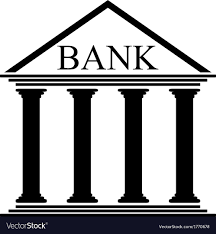

In [54]:
from IPython.display import Image
Image("bank.jpg")

#### Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
import pandas as pd 
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=";", encoding='ISO-8859-1')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


 ## Input variables:
 
   #### Bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   * 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   * 5 - default: has credit in default? (categorical: "no","yes","unknown")
   * 6 - housing: has housing loan? (categorical: "no","yes","unknown")
   * 7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### Related with the last contact of the current campaign:
   * 8 - contact: contact communication type (categorical: "cellular","telephone") 
   * 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   * 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   * 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   #### Other attributes:
   * 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   * 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   * 14 - previous: number of contacts performed before this campaign and for this client (numeric)
   * 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### Social and economic context attributes
   * 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
   * 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
   * 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   * 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
   * 20 - nr.employed: number of employees - quarterly indicator (numeric)

   #### Output variable (desired target):
   * 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Dataset Analysis

In [3]:
# Information about attribute types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# Statistical description of numeric dataset attributes
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Duplicated Values

In [7]:
# Removing Duplicate Values

print(df.duplicated().sum()) # 12 duplicate values 
df = df.drop_duplicates() # Values have been removed

12


## Hidden Missing Values

In [8]:
# Checking for null values
df.isnull().values.any()

False

> As stated in the description of the variables above, there are several missing values in some $categorical$ attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [9]:
print("# Missing job: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing marital: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing education: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing default: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing housing:: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing loan: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing contact: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing month: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing day_of_week: {0}".format(len(df.loc[df['day_of_week'] == "unknown"])))
print("# Missing poutcome: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))

# Missing job: 330
# Missing marital: 80
# Missing education: 1730
# Missing default: 8596
# Missing housing:: 990
# Missing loan: 990
# Missing contact: 0
# Missing month: 0
# Missing day_of_week: 0
# Missing poutcome: 0


## Outliers Analysis

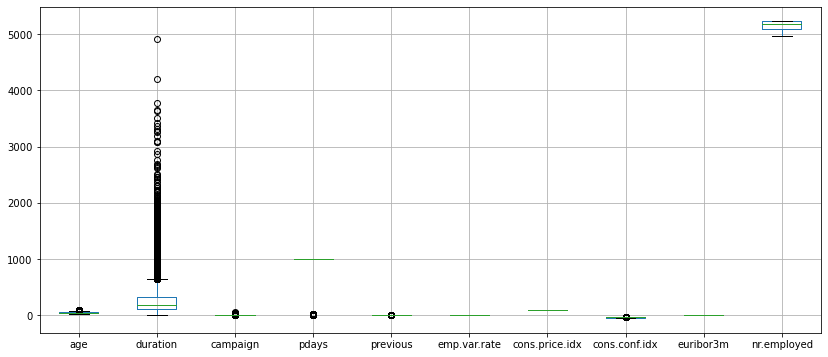

In [10]:
# Outliers are mainly found in our target column: y. No changes will need to be made.

plt.figure(figsize=(14,6))
df.boxplot()
print()

In [11]:
df[df['y'] == 'no'].groupby('y').duration.value_counts()

y   duration
no  85          168
    90          168
    73          166
    72          161
    136         160
               ... 
    3366          1
    3422          1
    3509          1
    3785          1
    4918          1
Name: duration, Length: 1259, dtype: int64

## Correlations

In [12]:
# Term Deposit Subscription (Target). Tranforming Yes = 1 / No = 0
df['y'] = 1 * (df['y']== 'yes')

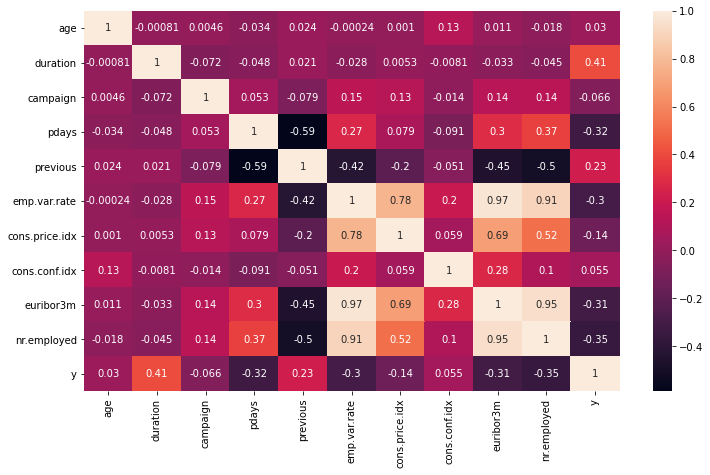

In [13]:
# Correlation between columns

plt.figure(figsize=(12,7))
correlacao = df.corr()
sns.heatmap(correlacao, annot = True);

In [14]:
# Analyzing the correlations between numeric columns with the target variable (y)

df.corr()['y'].drop('y').sort_values()

nr.employed      -0.354669
pdays            -0.324948
euribor3m        -0.307740
emp.var.rate     -0.298289
cons.price.idx   -0.136134
campaign         -0.066361
age               0.030381
cons.conf.idx     0.054802
previous          0.230202
duration          0.405297
Name: y, dtype: float64

## Data Balancing

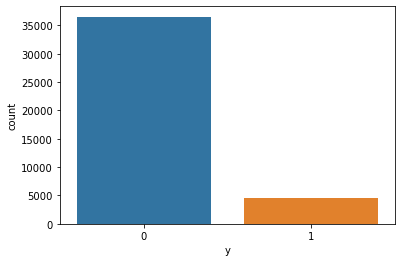

In [15]:
#Target distribution

sns.countplot(df['y']);

In [16]:
df_classe_majority = df[df.y==0]
df_classe_minority = df[df.y==1]

In [17]:
df_classe_majority.shape

(36537, 21)

In [18]:
df_classe_minority.shape

(4639, 21)

In [19]:
# Upsample of minority class
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority, 
                                           replace = True,     
                                           n_samples = 36537,   
                                           random_state = 150) 

In [20]:
df_balanced_data = pd.concat([df_classe_majority, df_classe_minority_upsampled])

In [21]:
df_balanced_data.y.value_counts()

0    36537
1    36537
Name: y, dtype: int64

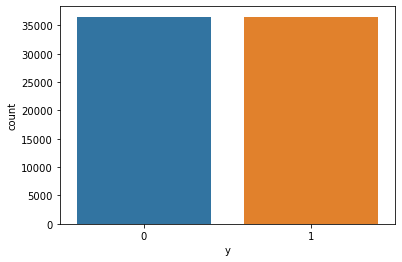

In [22]:
sns.countplot(df_balanced_data['y'])

> Balanced data. Saving the dataset with the manipulated data.

In [23]:
df_balanced_data.to_csv('df_modified.csv', encoding = 'utf-8', index = False)

## Business Questions

In [24]:
df2 = pd.read_csv('df_modified.csv')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### 1 - What is the average duration (in seconds) of the call for those who did not make a term deposit (0) ? And for those who made term deposits (1)?
> For those who made term deposits (1), the average time was 553.36 seconds, or 9 minutes. For those who did not make a term deposit (0), the average time was 220.86 seconds, or 3.7 minutes. It means that, for a customer to make a term deposit, more time is needed to convince him/her.

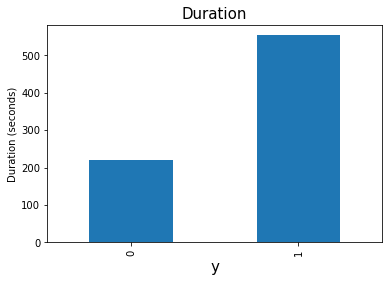

y
0    220.868079
1    553.362345
Name: duration, dtype: float64


In [25]:
time = df2.groupby('y').duration.mean()
time.plot.bar()
plt.title('Duration', fontsize = 15)
plt.xlabel('y', fontsize = 15)
plt.ylabel('Duration (seconds)')
plt.show()

print(time)

### 2 - In which month do customers usually make the most deposits?
> May is the month when most customers make a term deposit

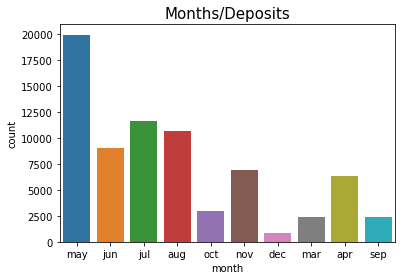

In [26]:
plt.title('Months/Deposits', fontsize = 15)
sns.countplot(df2['month'])
plt.show()

### 3 - Among those who made bank deposits, what was the main form of contact?
> The main form of contact is the cellular. Few customers who made term bank deposits were contacted by telephone.

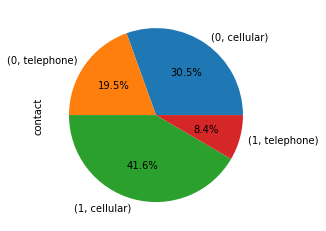

In [27]:
df2.groupby('y').contact.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### 4 - What type of job is most common among those who made bank deposits?
> Admin.

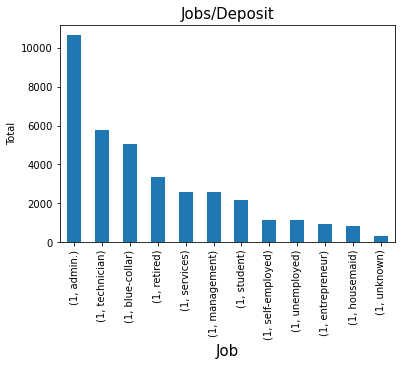

In [28]:
jobs = df2[df2['y'] == 1].groupby('y').job.value_counts()
jobs.plot.bar()

plt.title('Jobs/Deposit', fontsize = 15)
plt.xlabel('Job', fontsize = 15)
plt.ylabel('Total')

plt.show()

### 5 - What is the Age Distribution of Customers?
> Between 25 and 40 years old

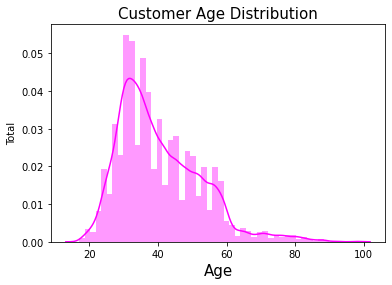

In [29]:
sns.distplot(df2['age'], color = 'magenta')
plt.title('Customer Age Distribution', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Total')
plt.show()

##  Spliting

In [30]:
# Turning All Categorical Attributes to Numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_var =['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in cat_var:
    df2[i]= le.fit_transform(df2[i]) 

df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [31]:
from sklearn.model_selection import train_test_split

X = df2.reset_index(drop=True).drop(['y'],axis=1)

y = df2['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
X.shape

(73074, 20)

In [33]:
y.shape

(73074,)

In [34]:
# Printing the results

print("{0:0.2f}% training data".format((len(X_train)/len(df2.index)) * 100))
print("{0:0.2f}% test data".format((len(X_test)/len(df2.index)) * 100))

70.00% training data
30.00% test data


## Developing and training the model

In [35]:
# Model evaluation metrics

from sklearn import metrics

###  Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.ravel())

nb_predict_test = nb.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])))
print("")

accuracy_nb = metrics.accuracy_score(y_test, nb_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_nb))
print()

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[8272 2630]
 [2270 8751]]

Accuracy: 0.7765

Classification Report
              precision    recall  f1-score   support

           1       0.78      0.76      0.77     10902
           0       0.77      0.79      0.78     11021

    accuracy                           0.78     21923
   macro avg       0.78      0.78      0.78     21923
weighted avg       0.78      0.78      0.78     21923



### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Terceira versão do modelo usando Regressão Logística
lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
lr.fit(X_train, y_train.ravel())

lr_predict_test = lr.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0])))
print("")

accuracy_lr = metrics.accuracy_score(y_test, lr_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_lr))
print()

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

Confusion Matrix
[[9479 1423]
 [1678 9343]]

Accuracy: 0.8586

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.87      0.86     10902
           0       0.87      0.85      0.86     11021

    accuracy                           0.86     21923
   macro avg       0.86      0.86      0.86     21923
weighted avg       0.86      0.86      0.86     21923



### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train.ravel())

rfc_predict_test = rfc.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rfc_predict_test, labels = [1, 0])))
print("")

accuracy_rfc = metrics.accuracy_score(y_test, rfc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_rfc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, rfc_predict_test, labels = [1, 0]))

Confusion Matrix
[[10884    18]
 [  808 10213]]

Accuracy: 0.9623

Classification Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.96     10902
           0       1.00      0.93      0.96     11021

    accuracy                           0.96     21923
   macro avg       0.96      0.96      0.96     21923
weighted avg       0.96      0.96      0.96     21923



### Decision Tree Classifier

In [39]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train.ravel())

dtc_predict_test = dtc.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, dtc_predict_test, labels = [1, 0])))
print("")

accuracy_dtc = metrics.accuracy_score(y_test, dtc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, dtc_predict_test, labels = [1, 0]))

Confusion Matrix
[[10879    23]
 [  883 10138]]

Accuracy: 0.9587

Classification Report
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10902
           0       1.00      0.92      0.96     11021

    accuracy                           0.96     21923
   macro avg       0.96      0.96      0.96     21923
weighted avg       0.96      0.96      0.96     21923



### Support Vector Machine Classifier

In [40]:
from sklearn import svm

svmc = svm.SVC()
svmc.fit(X_train, y_train.ravel())

svmc_predict_test = svmc.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, svmc_predict_test, labels = [1, 0])))
print("")

accuracy_svmc = metrics.accuracy_score(y_test, svmc_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_svmc))
print()

print("Classification Report")
print(metrics.classification_report(y_test, svmc_predict_test, labels = [1, 0]))

Confusion Matrix
[[9342 1560]
 [1846 9175]]

Accuracy: 0.8446

Classification Report
              precision    recall  f1-score   support

           1       0.84      0.86      0.85     10902
           0       0.85      0.83      0.84     11021

    accuracy                           0.84     21923
   macro avg       0.84      0.84      0.84     21923
weighted avg       0.84      0.84      0.84     21923



### Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(X_train, y_train.ravel())

gb_predict_test = gb.predict(X_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, gb_predict_test, labels = [1, 0])))
print("")

accuracy_gb = metrics.accuracy_score(y_test, gb_predict_test)
print("Accuracy: {0:.4f}".format(accuracy_gb))
print()

print("Classification Report")
print(metrics.classification_report(y_test, gb_predict_test, labels = [1, 0]))

Confusion Matrix
[[10222   680]
 [ 1723  9298]]

Accuracy: 0.8904

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.94      0.89     10902
           0       0.93      0.84      0.89     11021

    accuracy                           0.89     21923
   macro avg       0.89      0.89      0.89     21923
weighted avg       0.89      0.89      0.89     21923



## Comparing and evaluating models

In [42]:
# Table summary for better viewing

results = pd.DataFrame([
    {'Algorithm' : 'Naive Bayes', 'Accuracy' : accuracy_nb*100},
    {'Algorithm' : 'Logistic Regression', 'Accuracy' : accuracy_lr*100},
    {'Algorithm' : 'Random Forest', 'Accuracy' : accuracy_rfc*100},
    {'Algorithm' : 'Decision Tree', 'Accuracy' : accuracy_dtc*100},
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : accuracy_svmc*100},
    {'Algorithm' : 'Gradient Boosting', 'Accuracy' : accuracy_gb*100}
])

results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
2,Random Forest,96.232267
3,Decision Tree,95.867354
5,Gradient Boosting,89.038909
1,Logistic Regression,85.855038
4,Support Vector Machine,84.463805
0,Naive Bayes,77.649044


> Random Forest Classifier was the model that achieved the best accuracy, with 96.23%. It will be the model used to predict whether or not the customer will be able to sign a term deposit. The model will be saved and ready to make predictions.

## Making Predictions with the Trained Model

In [43]:
import pickle

# Saving the model

filename = 'rfc.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [44]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
result[:50]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0], dtype=int64)

In [45]:
real_full=df2['y']
real=real_full[:1000]

pred = rfc.predict(X_test)

df3=pd.DataFrame({'real': real, 'prediction':pred[:1000]})

In [46]:
# Real x Prediction for the first 1000 lines

df3.head()

,real,prediction
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1


In [47]:
# How many of the predictions are the same or different from the real ones in the first 1000 lines

print(df3[df3['real'] == df3['prediction']].value_counts())
print(df3[df3['real'] != df3['prediction']].value_counts())

real  prediction
0     0             445
dtype: int64
real  prediction
0     1             555
dtype: int64


## Classification Test

In [48]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [49]:
# Putting all the necessary variables for the classification test, except the target variable (y).

test = np.array([[45,1,1,4,0,0,0,1,3,2,200,1,7,0,1,1.1,93.200,-36.4,4.961,5008.7]])

In [50]:
rfc.predict(test)

array([0], dtype=int64)

In [51]:
# Probability of the sample to be Class 0 (No) or Class 1 (Yes)

rfc.predict_proba(test)

array([[0.64, 0.36]])

## Conclusion

* Random Forest Classifier was the model that achieved the best accuracy, with 96.23%;


* From the model, it will be possible to predict whether or not the customer will subscribe a term deposit, placing all the necessary variables for the classification test;


* The 'duration' outliers could be removed, such as values equal to zero, which indicates that there was no contact with the customer, so consequently there was no term deposit. But this could damage the entire structure of the models, so they were kept for the algorithms to learn. In this case, there would need to be an agreement with the bank's business area, which would (or not) guide the deletion of this data, in case they were unnecessary;


* The same case would apply to the 'unknown' values, found in several columns of the dataset. Who should decide the exclusion or imputation of these data would be the business area;


* Other models can and should be tested;